                Company  PageRank
2  Retail Solutions LLC  0.219895
6  SmartHome Devices Co  0.167539
0       HealthWorks Ltd  0.160340
4     AgriTech Partners  0.138089
1        FinTech Global  0.104712


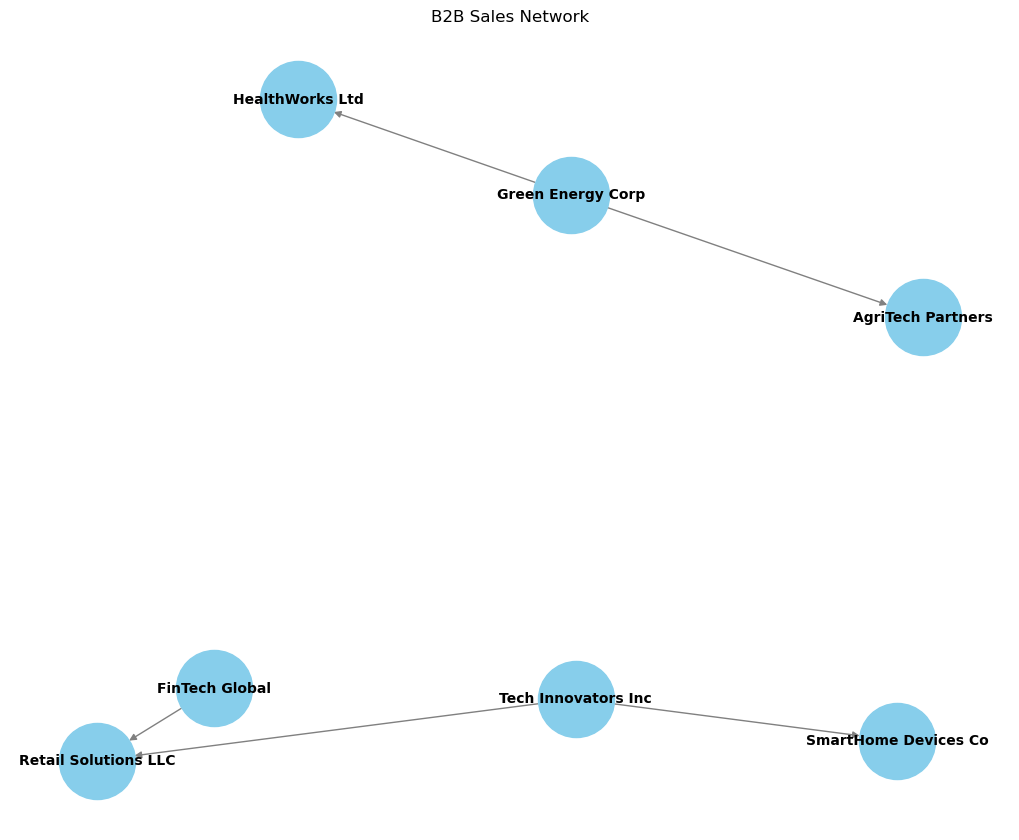

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Prepare the Data

# B2B Sales Numbers Dataset
b2b_sales_data = pd.DataFrame({
    'Seller_Company': ['Tech Innovators Inc', 'Green Energy Corp', 'Tech Innovators Inc', 'FinTech Global', 'Green Energy Corp'],
    'Buyer_Company': ['Retail Solutions LLC', 'HealthWorks Ltd', 'SmartHome Devices Co', 'Retail Solutions LLC', 'AgriTech Partners'],
    'Sales_Amount': [50000, 75000, 120000, 60000, 45000],
    'Transaction_Date': ['2024-01-15', '2024-02-20', '2024-03-05', '2024-04-10', '2024-05-18'],
    'Region': ['North America', 'Europe', 'Asia', 'North America', 'Europe'],
    'Payment_Terms': ['Net 30', 'Net 45', 'Net 30', 'Net 60', 'Net 30'],
    'Product_Category': ['Electronics', 'Renewable Energy', 'IoT Devices', 'Financial Software', 'AgriTech'],
    'Future_Prospects': ['Expansion Potential', 'Strong', 'Growing Market', 'Stable', 'Emerging Opportunities']
})

# Financials of a Company Dataset
financial_data = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2021, 2022, 2023, 2021, 2022, 2023, 2021, 2022, 2023],
    'Company': ['Tech Innovators Inc', 'Tech Innovators Inc', 'Tech Innovators Inc', 'Green Energy Corp', 'Green Energy Corp', 'Green Energy Corp',
                'HealthWorks Ltd', 'HealthWorks Ltd', 'HealthWorks Ltd', 'FinTech Global', 'FinTech Global', 'FinTech Global'],
    'Revenue': [500000, 600000, 650000, 450000, 550000, 600000, 700000, 800000, 850000, 600000, 700000, 750000],
    'Net_Income': [50000, 70000, 80000, 40000, 60000, 70000, 80000, 90000, 100000, 50000, 60000, 70000],
    'Total_Assets': [1500000, 1600000, 1700000, 1400000, 1500000, 1600000, 1800000, 1900000, 2000000, 1600000, 1700000, 1800000],
    'Total_Liabilities': [700000, 750000, 800000, 600000, 650000, 700000, 900000, 950000, 1000000, 800000, 850000, 900000],
    'Equity': [800000, 850000, 900000, 800000, 850000, 900000, 900000, 950000, 1000000, 800000, 850000, 900000],
    'Shares_Outstanding': [1000000, 1050000, 1100000, 950000, 1000000, 1050000, 1500000, 1550000, 1600000, 1200000, 1250000, 1300000],
    'Stock_Price': [50, 55, 60, 40, 45, 50, 60, 65, 70, 55, 60, 65],
    'R&D_Expenditure': [100000, 120000, 130000, 80000, 90000, 100000, 120000, 130000, 140000, 90000, 100000, 110000],
    'Future_Growth_Prospects': ['High', 'High', 'Very High', 'Medium', 'High', 'Very High', 'High', 'Very High', 'Very High', 'Medium', 'High', 'High']
})

# ESG Values of a Company Dataset
esg_data = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2021, 2022, 2023, 2021, 2022, 2023, 2021, 2022, 2023],
    'Company': ['Tech Innovators Inc', 'Tech Innovators Inc', 'Tech Innovators Inc', 'Green Energy Corp', 'Green Energy Corp', 'Green Energy Corp',
                'HealthWorks Ltd', 'HealthWorks Ltd', 'HealthWorks Ltd', 'FinTech Global', 'FinTech Global', 'FinTech Global'],
    'Environmental_Score': [75, 78, 80, 80, 82, 85, 70, 72, 75, 68, 70, 73],
    'Social_Score': [80, 82, 85, 85, 88, 90, 75, 78, 80, 70, 72, 75],
    'Governance_Score': [70, 72, 75, 75, 78, 80, 65, 68, 70, 60, 65, 68],
    'Overall_ESG_Score': [75, 77, 80, 80, 82, 85, 70, 73, 75, 66, 69, 72],
    'CO2_Emissions (tons)': [5000, 4800, 4600, 4000, 3800, 3600, 5500, 5300, 5100, 6000, 5800, 5600],
    'Diversity_Initiatives': ['Employee Diversity', 'Gender Equality', 'Inclusive Culture', 'Sustainable Sourcing', 'Community Engagement', 'Green Initiatives',
                              'Health & Safety', 'Employee Well-being', 'Community Support', 'Ethical Practices', 'Governance Training', 'Transparent Reporting'],
    'Governance_Transparency': ['High', 'High', 'Very High', 'High', 'High', 'Very High', 'Medium', 'High', 'High', 'Medium', 'High', 'High']
})

# Step 2: Construct the Graph

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each company
companies = set(b2b_sales_data['Seller_Company']).union(set(b2b_sales_data['Buyer_Company']))
G.add_nodes_from(companies)

# Add edges based on B2B sales transactions with weights as Sales_Amount
for _, row in b2b_sales_data.iterrows():
    G.add_edge(row['Seller_Company'], row['Buyer_Company'], weight=row['Sales_Amount'])

# Step 3: Analyze the Graph

# Use PageRank to identify central companies
pagerank = nx.pagerank(G, weight='weight')

# Convert PageRank result to a DataFrame
pagerank_df = pd.DataFrame(list(pagerank.items()), columns=['Company', 'PageRank']).sort_values(by='PageRank', ascending=False)

# Display top companies with the highest PageRank
print(pagerank_df.head())

# Optional: Visualize the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("B2B Sales Network")
plt.show()


                Company  PageRank
0       HealthWorks Ltd  0.550431
2  Retail Solutions LLC  0.112349
6  SmartHome Devices Co  0.084142
5   Tech Innovators Inc  0.074089
4     AgriTech Partners  0.071109


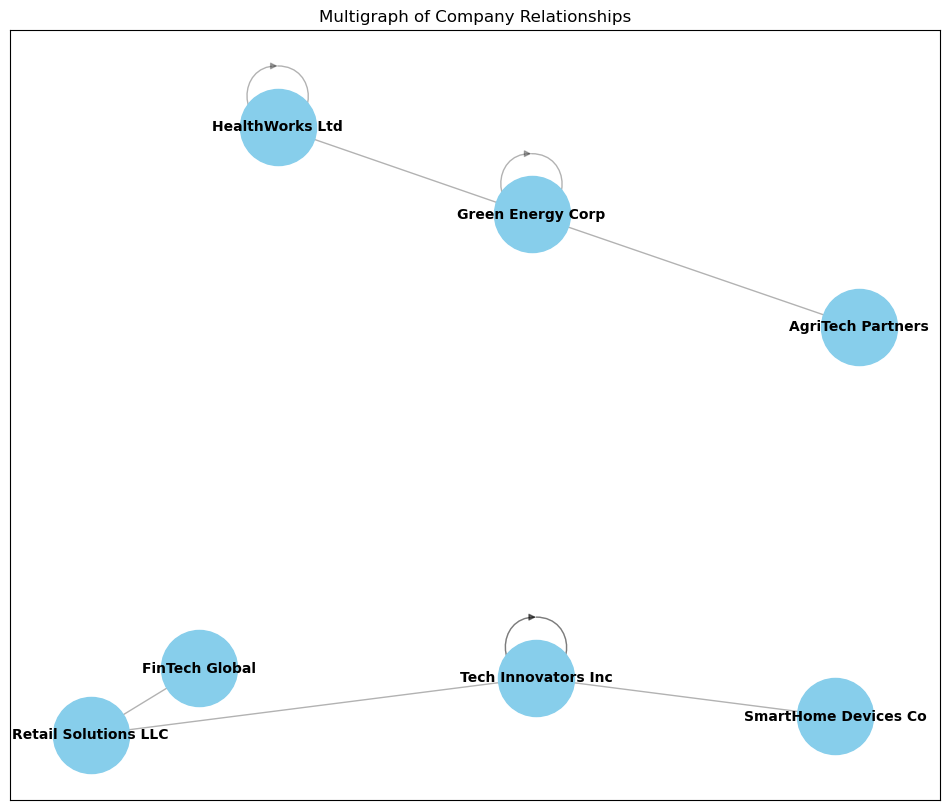

Potential customers for Tech Innovators Inc: ['Tech Innovators Inc']


In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Prepare the Data (already provided)

# B2B Sales Numbers Dataset
b2b_sales_data = pd.DataFrame({
    'Seller_Company': ['Tech Innovators Inc', 'Green Energy Corp', 'Tech Innovators Inc', 'FinTech Global', 'Green Energy Corp'],
    'Buyer_Company': ['Retail Solutions LLC', 'HealthWorks Ltd', 'SmartHome Devices Co', 'Retail Solutions LLC', 'AgriTech Partners'],
    'Sales_Amount': [50000, 75000, 120000, 60000, 45000],
    'Transaction_Date': ['2024-01-15', '2024-02-20', '2024-03-05', '2024-04-10', '2024-05-18'],
    'Region': ['North America', 'Europe', 'Asia', 'North America', 'Europe'],
    'Payment_Terms': ['Net 30', 'Net 45', 'Net 30', 'Net 60', 'Net 30'],
    'Product_Category': ['Electronics', 'Renewable Energy', 'IoT Devices', 'Financial Software', 'AgriTech'],
    'Future_Prospects': ['Expansion Potential', 'Strong', 'Growing Market', 'Stable', 'Emerging Opportunities']
})

# Financials of a Company Dataset
financial_data = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2021, 2022, 2023, 2021, 2022, 2023, 2021, 2022, 2023],
    'Company': ['Tech Innovators Inc', 'Tech Innovators Inc', 'Tech Innovators Inc', 'Green Energy Corp', 'Green Energy Corp', 'Green Energy Corp',
                'HealthWorks Ltd', 'HealthWorks Ltd', 'HealthWorks Ltd', 'FinTech Global', 'FinTech Global', 'FinTech Global'],
    'Revenue': [500000, 600000, 650000, 450000, 550000, 600000, 700000, 800000, 850000, 600000, 700000, 750000],
    'Net_Income': [50000, 70000, 80000, 40000, 60000, 70000, 80000, 90000, 100000, 50000, 60000, 70000],
    'Total_Assets': [1500000, 1600000, 1700000, 1400000, 1500000, 1600000, 1800000, 1900000, 2000000, 1600000, 1700000, 1800000],
    'Total_Liabilities': [700000, 750000, 800000, 600000, 650000, 700000, 900000, 950000, 1000000, 800000, 850000, 900000],
    'Equity': [800000, 850000, 900000, 800000, 850000, 900000, 900000, 950000, 1000000, 800000, 850000, 900000],
    'Shares_Outstanding': [1000000, 1050000, 1100000, 950000, 1000000, 1050000, 1500000, 1550000, 1600000, 1200000, 1250000, 1300000],
    'Stock_Price': [50, 55, 60, 40, 45, 50, 60, 65, 70, 55, 60, 65],
    'R&D_Expenditure': [100000, 120000, 130000, 80000, 90000, 100000, 120000, 130000, 140000, 90000, 100000, 110000],
    'Future_Growth_Prospects': ['High', 'High', 'Very High', 'Medium', 'High', 'Very High', 'High', 'Very High', 'Very High', 'Medium', 'High', 'High']
})

# ESG Values of a Company Dataset
esg_data = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2021, 2022, 2023, 2021, 2022, 2023, 2021, 2022, 2023],
    'Company': ['Tech Innovators Inc', 'Tech Innovators Inc', 'Tech Innovators Inc', 'Green Energy Corp', 'Green Energy Corp', 'Green Energy Corp',
                'HealthWorks Ltd', 'HealthWorks Ltd', 'HealthWorks Ltd', 'FinTech Global', 'FinTech Global', 'FinTech Global'],
    'Environmental_Score': [75, 78, 80, 80, 82, 85, 70, 72, 75, 68, 70, 73],
    'Social_Score': [80, 82, 85, 85, 88, 90, 75, 78, 80, 70, 72, 75],
    'Governance_Score': [70, 72, 75, 75, 78, 80, 65, 68, 70, 60, 65, 68],
    'Overall_ESG_Score': [75, 77, 80, 80, 82, 85, 70, 73, 75, 66, 69, 72],
    'CO2_Emissions (tons)': [5000, 4800, 4600, 4000, 3800, 3600, 5500, 5300, 5100, 6000, 5800, 5600],
    'Diversity_Initiatives': ['Employee Diversity', 'Gender Equality', 'Inclusive Culture', 'Sustainable Sourcing', 'Community Engagement', 'Green Initiatives',
                              'Health & Safety', 'Employee Well-being', 'Community Support', 'Ethical Practices', 'Governance Training', 'Transparent Reporting'],
    'Governance_Transparency': ['High', 'High', 'Very High', 'High', 'High', 'Very High', 'Medium', 'High', 'High', 'Medium', 'High', 'High']
})

# Step 2: Construct the MultiDiGraph

# Create a multi-directed graph
G = nx.MultiDiGraph()

# Add nodes for each company
companies = set(b2b_sales_data['Seller_Company']).union(set(b2b_sales_data['Buyer_Company']))
G.add_nodes_from(companies)

# Add edges based on B2B sales transactions
for _, row in b2b_sales_data.iterrows():
    G.add_edge(row['Seller_Company'], row['Buyer_Company'], key='Sales', weight=row['Sales_Amount'])

# Add edges based on ESG scores (weighted by Overall_ESG_Score)
for _, row in esg_data.iterrows():
    if row['Overall_ESG_Score'] > 75:  # Only adding edges for companies with high ESG scores
        G.add_edge(row['Company'], row['Company'], key='ESG', weight=row['Overall_ESG_Score'])

# Add edges based on financial relationships (e.g., high Net_Income)
for _, row in financial_data.iterrows():
    if row['Net_Income'] > 70000:  # Only adding edges for companies with high net income
        G.add_edge(row['Company'], row['Company'], key='Financial', weight=row['Net_Income'])

# Step 3: Analyze the Graph

# Use PageRank to identify central companies
pagerank = nx.pagerank(G, weight='weight')

# Convert PageRank result to a DataFrame
pagerank_df = pd.DataFrame(list(pagerank.items()), columns=['Company', 'PageRank']).sort_values(by='PageRank', ascending=False)


# Display top companies with the highest PageRank
print(pagerank_df.head())

# Optional: Visualize the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="skyblue")
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")
plt.title("Multigraph of Company Relationships")
plt.show()

# Predict potential customers
def predict_potential_customers(company, G):
    neighbors = list(G.neighbors(company))
    potential_customers = []
    for neighbor in neighbors:
        if G.has_edge(company, neighbor, key='Sales'):
            continue
        potential_customers.append(neighbor)
    return potential_customers

# Example prediction
company_to_check = 'Tech Innovators Inc'
potential_customers = predict_potential_customers(company_to_check, G)
print(f"Potential customers for {company_to_check}: {potential_customers}")
